### Funktionen

Umrechnung von Celsius in Fahrenheit

In [ ]:
def F(C):
     return (9.0/5)*C + 32

In [ ]:
print F(10)

In [ ]:
Cdegrees = range(-20,41,5)
Fdegrees = [F(C) for C in Cdegrees]
print Cdegrees
print Fdegrees

### global und lokal definierte Variablen

In [ ]:
print sum # sum ist eine interne Python Funktion
sum = 500 # Neudefinition des Namens sum
print sum # sum ist nun eine globale Variable

def myfunc(n):
    sum = n + 1 
    print sum  # sum ist an dieser Stelle eine lokale Variable
    return sum

sum = myfunc(2) + 1 # neuer Wert für sum (globale Variable)
print sum

In [ ]:
a= 20;b=-2.5    # globale Variable

def f1(x): 
    a=21            # Neue lokale Variable
    return a*x + b

print a             # 20 wird ausgegeben

def f2(x):
    global a
    a=21           # die globale Variable wird verändert
    return a*x + b
    
f1(3); print a   # 20 wird ausgegeben
f2(3); print a   # 21 wird ausgegeben

### Vertikaler Wurf

In [ ]:
def yfunc(t, v0):
    g = 9.81
    return v0*t - 0.5*g*t**2

In [ ]:
y = yfunc(0.1, 6)
print y

In [ ]:
y = yfunc(0.1, v0=6)
print y

In [ ]:
y = yfunc(t=0.1, v0=6)
print y

In [ ]:
y = yfunc(v0=6, t=0.1)
print y

### Funktion von genau einer Variablen (Mathematik)

In [ ]:
def yfunc(t):
    g = 9.81
    return v0*t - 0.5*g*t**2

In [ ]:
print yfunc (0.6)

In [ ]:
v0 = 5
print yfunc (0.6)

### Funktion für die Erzeugung einer Liste

In [ ]:
def makelist(start, stop, inc):
    value = start
    result = []
    while value <= stop:
        result.append(value)
        value = value + inc
    return result

mylist = makelist(0, 10, 0.325)
print mylist # Ausgabe:  0, 0.2, 0.4, 0.6, ... 99.8, 100

### Mehr als ein Funktionswert 

z.B. kann die Rückgabe ein Funktionswert und die Änderungsrate sein
also =>  f(x) und f'(x)

In [ ]:
def yfunc(t, v0):
    g = 9.81
    y = v0*t - 0.5*g*t**2
    dydt = v0 - g*t
    return y, dydt

In [ ]:
position , velocity = yfunc (0.1 , 3)
print position, velocity

### Position und Geschwindigkeit berechnen

In [ ]:
t_values = [0.05*i for i in range(10)]
for t in t_values:
    pos, vel = yfunc(t, v0=5)
    print 't=%-10g position=%-10g velocity=%-10g' % (t, pos, vel)

### Rechnen mit log(x + 1)

Sei 

$$
L(x;n)=\sum\limits_{i=1}^n  \frac{1}{i} \left(   \frac{x}{1+x}     \right)^i
$$

und 

$$
ln(1+x)=   \lim_{n\to\infty}   L(x;n) 
$$


In [ ]:
from math import log

def L(x, n): 
    s=0.0
    for i in range(1, n+1):
        s += (1.0/i)*(x/(1.0+x))**i
    value_of_sum = s    
    first_neglected_term = (1.0/(n+1))*(x/(1.0+x))**(n+1)
    exact_error = log(1+x) - value_of_sum
    return value_of_sum, first_neglected_term, exact_error

In [ ]:
### Test
x = 3.4
value, approximate_error, exact_error = L(x, 100)
print value, approximate_error, exact_error

### Vordefinierte Parameter

In [ ]:
from math import pi, exp, sin
def f(t, A=1, a=1, omega=2*pi):
     return A*exp(-a*t)*sin(omega*t)

In [ ]:
v1 = f(0.2)
v2 = f(0.2, omega=1)
v3 = f(1, A=5, omega=pi, a=pi**2)
v4 = f(A=5, a=2, t=0.01, omega=0.1)
v5 = f(0.2, 0.5, 1, 1)

print v1
print v2
print v3
print v4
print v5

In [ ]:
def L2(x, epsilon=1.0E-6):
    x = float(x)
    i=1
    term = (1.0/i)*(x/(1+x))**i 
    s = term
    while abs(term) > epsilon:    # abs(x) ist |x|
        i += 1
        term = (1.0/i)*(x/(1+x))**i
        s += term
    return s, i

In [ ]:
from math import log
x = 10
for k in range(4, 14, 2):
    epsilon = 10**(-k)
    approx, n = L2(x, epsilon=epsilon)
    exact = log(1+x)
    exact_error = exact - approx
    print 'epsilon: %5.0e, exact error: %8.2e, n=%d' \
             % (epsilon, exact_error, n)

### Funktionale Programmierung

Parameter können nun auch Funktionen sein

* Beispiel 2. Ableitung

$$
f^{''}(x) \approx \frac{f(x-h)-2f(x)+f(x+h)}{h^2}
$$

In [ ]:
def diff2(f, x, h=1E-6):
    r = (f(x-h) - 2*f(x) + f(x+h))/float(h*h)
    return r

In [ ]:
def g(t):
     return t**(-6)

t = 1.2
d2g = diff2(g, t)
print "g''(%f)=%f" % (t, d2g)

### Fallunterscheidung / Verzweigungen

$$
f(x) = \left\{
     \begin{array}{ll}
       \sin(x) &\mbox{für } 0 \le x\le \pi\\
       0 & sonst
     \end{array}
   \right.
   $$

In [ ]:
def f(x):
    if 0 <= x <= pi:
        value = sin(x)
    else:
        value = 0
    return value

In [ ]:
C = -200

In [ ]:
if C < -273.15:
    print '%g degrees Celsius is non-physical!' % C
    print 'The Fahrenheit temperature will not be computed.'
else:
    F = 9.0/5*C + 32
    print F ,'°F'
print 'end of program'

$$
N(x) = \left\{
     \begin{array}{ll}
       0, &x < 0\\
       x, &0\le x < 1\\
       2-x, &1\le x < 2\\
       0, & x \ge 2
     \end{array}
   \right.
$$

In [1]:
def N(x):
    if x < 0:
        return 0.0
    elif 0 <= x < 1:
        return x
    elif 1 <= x < 2:
        return 2 - x
    elif x >= 2:
        return 0.0

In [2]:
N(2)

0.0

/Users/guggisbe/dev/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


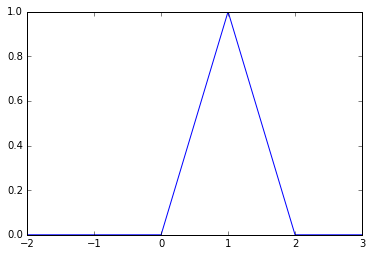

In [3]:
%matplotlib inline
from matplotlib.pyplot import *
import numpy as np


X = np.linspace(-2, 3, 51)        # 51 Punkte zwischen 0 und 3
Y = np.zeros(len(X))             # Array mit gleicher Groesse
for i in xrange(len(X)):
    Y[i] = N(X[i])            # Funktionswerte berechnen

plot(X, Y)
show()

### Rechnen mit mathematischen Funktionen

In [6]:
# Funktionsdefinition
def quadratic_polynomial(x, a, b, c):
    value = a*x*x + b*x + c
    derivative = 2*a*x + b
    return value, derivative

# Funktionsaufruf
x=1
p, dp = quadratic_polynomial(x, 2, 0.5, 1)
print p, dp
p, dp = quadratic_polynomial(x=x, a=-4, b=0.5, c=0)
print p, dp

3.5 4.5
-3.5 -7.5


In [8]:
from math import exp,sin,pi

def f(x, A=1, a=1, w=pi):
      return A*exp(-a*x)*sin(w*x)

f1 = f(0)
x2 = 0.1
f2 = f(x2, w=2*pi)
f3 = f(x2, w=4*pi, A=10, a=0.1)
f4 = f(w=4*pi, A=10, a=0.1, x=x2)

print 'f1 = ', f1 
print 'f2 = ', f2 
print 'f3 = ', f3 
print 'f4 = ', f4 

f1 =  0.0
f2 =  0.531850090044
f3 =  9.41593345844
f4 =  9.41593345844


In [11]:
def f(x):
    if x < 0:
        value = -1
    elif x >= 0 and x <= 1:
        value = x
    else:
        value = 1
    return value


print f(-1)
print f(0)
print f(2)

-1
0
1


## Numerische Integration

Ein Bestimmtes Integral $\int\limits_{a}^b f(x) dx$
kann mit dem Simpson Verfahren angenähert werden.



$$
\int\limits_{a}^b f(x) dx =
\frac{b-a}{3n} \left(  
(a)+f(b)+\sum\limits_{i=1}^{n/2}f(a+(2i-1)h)+2\sum\limits_{i=1}^{n/2-1}f(a+2ih)
\right)$$

In [13]:
def Simpson(f, a, b, n=500):
    h = (b - a)/float(n)
    sum1 = 0
    for i in range(1, n/2 + 1):
        sum1 += f(a + (2*i-1)*h)
    sum2 = 0
    for i in range(1, n/2):
        sum2 += f(a + 2*i*h)
    integral = (b-a)/(3*n)*(f(a) + f(b) + 4*sum1 + 2*sum2) 
    return integral

In [14]:
def h(x):
    return (3./2)*sin(x)**3

In [17]:
from math import sin, pi

print 'Integral of 1.5*sin^3 from 0 to pi:'
for n in 2, 6, 12, 100, 500:
    approx = Simpson(h, 0, pi, n)
    print 'n=%3d, approx=%18.15f, error=%9.2E' \
        % (n, approx, 2-approx)



Integral of 1.5*sin^3 from 0 to pi:
n=  2, approx= 3.141592653589793, error=-1.14E+00
n=  6, approx= 1.989171700583579, error= 1.08E-02
n= 12, approx= 1.999489233010781, error= 5.11E-04
n=100, approx= 1.999999902476350, error= 9.75E-08
n=500, approx= 1.999999999844138, error= 1.56E-10
